<h1 align="center">Introduction to Machine Learning - Course Code: 25737</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 2

</h4>

# Personal Data

In [1]:
# Set your student number
student_number = 400101872
Name = 'Matin'
Last_Name = 'Mohamad ghasemi '

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- You are not allowed to use `torch.nn`, `torch.optim` and any activation function and loss function implemented in torch. 

## Question 1) Convolutional Neural Networks ``(50 pt.)``

In this question, you'll be coding up a convolutional neural network from scratch to classify images using PyTorch.  

### Instructions
- Install PyTorch following the instructions [here](https://pytorch.org/).
- Install the [`torchinfo` package](https://github.com/TylerYep/torchinfo) to visualize the network architecture and the number of parameters. The maximum number of parameters you are allowed to use for your network is **100,000**. 
- You are required to complete the functions defined in the code blocks following each question. Fill out sections of the code marked `"YOUR CODE HERE"`.
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary.

In [29]:
%pip install torch torchvision torchaudio
%pip install torchinfo

  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/51/c8/2034c6a6b203fe79c9df8d8e018bfac989cd718be4b0c36940e1fc691fd0/torchaudio-2.3.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/3f/6f/79fe2cb91908b3d3a57b8ef68911123f797c0fb05a268a6da86cc5a67484/torchaudio-2.2.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/8d/23/285f4566c0ab1c0499f88bbfa69d896a3546ed757f177b829a9fd4fac28f/torchaudio-2.2.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/79/f7/5929802a1d14693d2dea6e60c51a923724348f134a91558f22bc686d3d8b/torchaudio-2.2.0-cp311-cp

### Data Preparation
In this assignment, we will use the Fashion-MNIST dataset. Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.  

#### Data

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.  

#### Labels

Each training and test example is assigned to one of the following labels:

| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

Fashion-MNIST is included in the `torchvision` library.

In [11]:
# Import required packages
from torchvision.datasets import FashionMNIST
from torchvision.transforms import Compose, ToTensor, Normalize
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Transform to normalize the data and convert to a tensor
transform = Compose([ToTensor(), Normalize((0.5,), (0.5,))])

# Download the data
dataset = FashionMNIST('MNIST_data/', download = True, train = True, transform = transform)

100%|██████████| 26421880/26421880 [00:02<00:00, 10623266.63it/s]


Extracting MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 238147.23it/s]


Extracting MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5300978.14it/s]


Extracting MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17511984.58it/s]

Extracting MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/FashionMNIST/raw



### Data Exploration
Let's take a look at the classes in our dataset.

In [7]:
print(dataset.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Now, visualize an instance from each class.

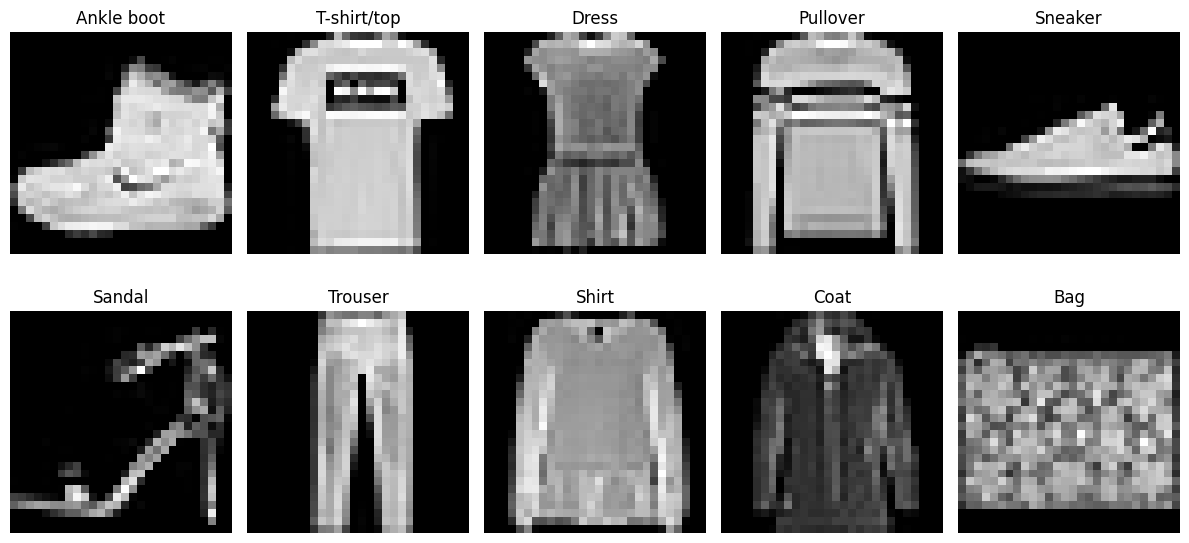

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'dataset' is a list of tuples (image, label)
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

instances = {}

# Iterate over the dataset
for img, label in dataset:
    # Store the first instance of each label
    if label not in instances:
        instances[label] = img
    # Break the loop if we have collected all class labels
    if len(instances) == len(class_labels):
        break

# Create a 2x5 subplot
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

# Display each image
for idx, (label, img) in enumerate(instances.items()):
    # Assuming 'img' is a NumPy array
    img = img.squeeze()  # Remove single-dimensional entries
    axes[idx].imshow(img, cmap='gray')  # Display the image in grayscale
    axes[idx].set_title(class_labels[label])  # Set the title to the class label
    axes[idx].axis('off')  # Hide the axes

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


### Creating Training and Validation Datasets

The `split_indices` function takes in the size of the entire dataset, `n`, the fraction of data to be used as validation set, `val_frac`, and the random seed and returns the indices of the data points to be added to the validation dataset. 

In [9]:
def split_indices(n, val_frac, seed):
    # Determine the size of the validation set
    n_val = int(val_frac * n)
    np.random.seed(seed)
    # Create random permutation between 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_val indices for validation set
    return idxs[n_val:], idxs[:n_val]

In [12]:
# Set the fraction of data for validation and the random seed
val_frac = 0.2
rand_seed = 40

# Assume dataset is your actual dataset
train_indices, val_indices = split_indices(len(dataset), val_frac, rand_seed)
print(f"Number of samples in training set: {len(train_indices)}")
print(f"Number of samples in validation set: {len(val_indices)}")

##val_frac =  ## Set the fraction for the validation set
##rand_seed =  ## Set the random seed

train_indices, val_indices = split_indices(len(dataset), val_frac, rand_seed)
print("number of samples in training set: {}".format(len(train_indices)))
print("number of samples in validation set: {}".format(len(val_indices)))

number of samples in training set: 48000
number of samples in validation set: 12000


Next, we make use of the built-in dataloaders in PyTorch to create iterables of our our training and validation sets. This helps in avoiding fitting the whole dataset into memory and only loads a batch of the data that we can decide. 

In [13]:
# Import required packages
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [14]:
class SubsetRandomSampler:
    def __init__(self, indices):
        self.indices = indices

    def __iter__(self):
        random.shuffle(self.indices)
        return iter(self.indices)

    def __len__(self):
        return len(self.indices)

class DataLoader:
    def __init__(self, dataset, batch_size, sampler):
        self.dataset = dataset
        self.batch_size = batch_size
        self.sampler = sampler

    def __iter__(self):
        batch = []
        for idx in self.sampler:
            batch.append(self.dataset[idx])
            if len(batch) == self.batch_size:
                yield batch
                batch = []
        if batch:
            yield batch

    def __len__(self):
        return len(self.sampler) // self.batch_size
batch_size = 64

# Training sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset,
                     batch_size,
                     sampler=train_sampler)

# Validation sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_dl = DataLoader(dataset,
                   batch_size,
                   sampler=val_sampler)

Plot images in a sample batch of data.

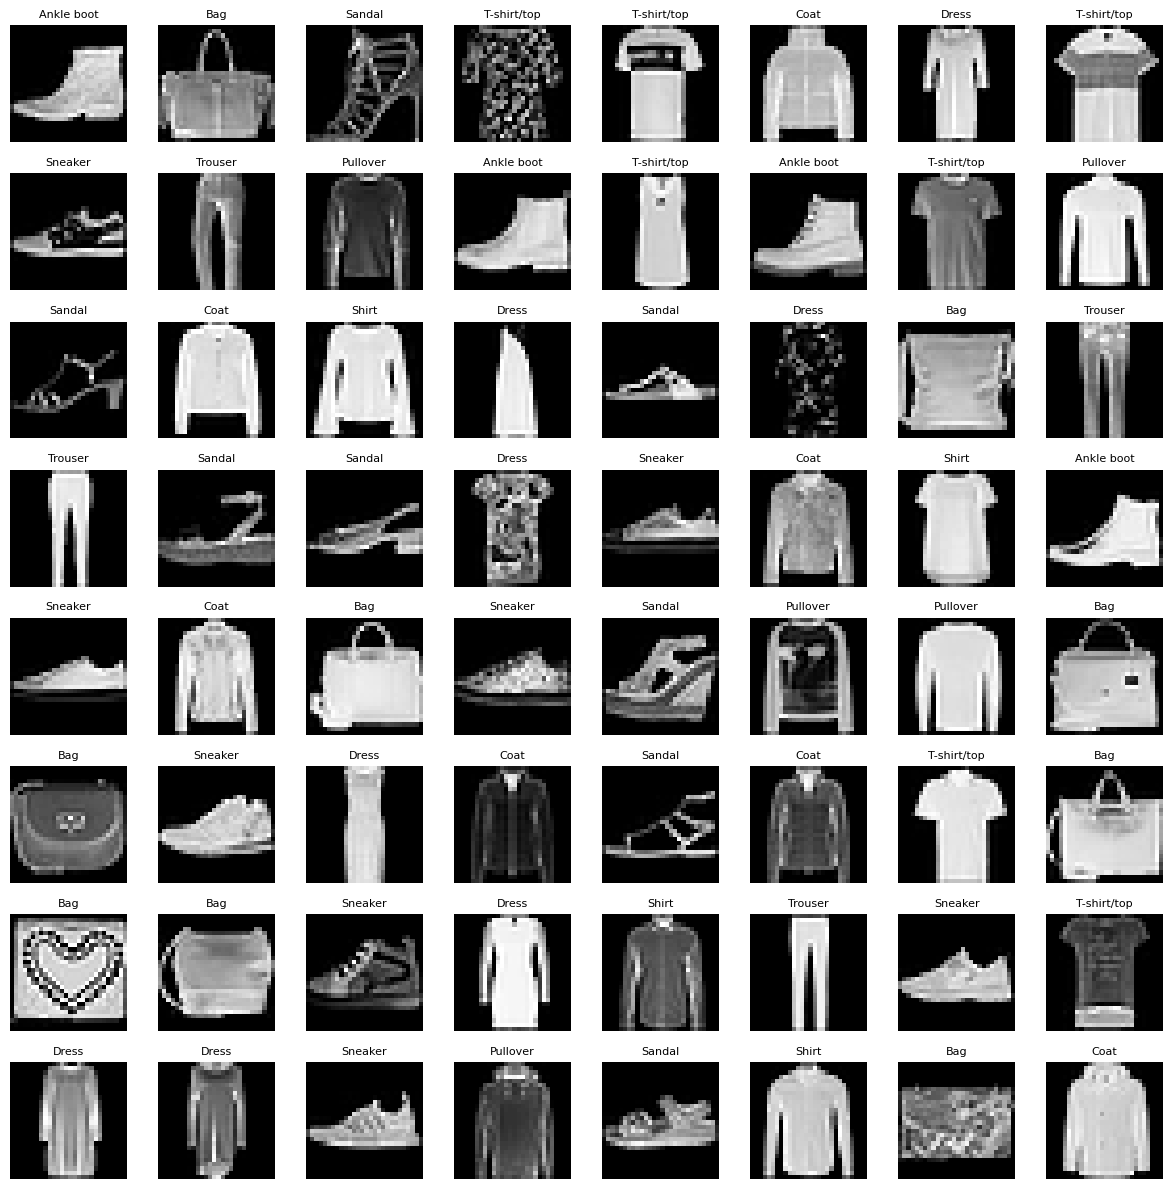

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot images
def imshow(img, labels, class_labels, ncols=8):
    fig, axes = plt.subplots((len(img) + ncols - 1) // ncols, ncols, figsize=(12, 12))
    axes = axes.flatten()

    for i, (image, label) in enumerate(zip(img, labels)):
        image = image / 2 + 0.5  # Unnormalize the image
        npimg = image.numpy()
        ax = axes[i]
        ax.imshow(npimg, cmap='gray')  # Display as grayscale
        ax.set_title(class_labels[label.item()], fontsize=8)
        ax.axis('off')

    for j in range(len(img), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Assuming `images` and `labels` contain your batch of images and corresponding labels
imshow(images, labels, class_labels)


### Building the Model
Create your model by defining the network architecture in the `ImageClassifierNet` class.<br>
**NOTE:** The number of parameters in your network must be $\leq$ 100,000.

In [30]:
# Import required packages
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary

In [37]:
class ImageClassifierNet(nn.Module):
    def __init__(self, n_channels=3):
        super(ImageClassifierNet, self).__init__()
        # Define the network architecture
        self.conv1 = nn.Conv2d(n_channels, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)  # Assuming 10 classes for classification
        
    def forward(self, X):
          # Forward pass
        X = self.pool(F.relu(self.conv1(X)))
        X = self.pool(F.relu(self.conv2(X)))
        X = X.view(-1, 32 * 7 * 7)  # Flatten the feature maps
        X = F.relu(self.fc1(X))
        X = self.fc2(X)
        return X

In [38]:
model = ImageClassifierNet()
# Print model summary to check the number of parameters
summary(model, input_size=(1, 3, 28, 28))  # Assuming input image size is 28x28 with 3 channels

The following code block prints your network architecture. It also shows the total number of parameters in your network (see `Total params`).  

**NOTE: The total number of parameters in your model should be <= 100,000.**

In [39]:
summary(model, input_size=(batch_size, 1, 28, 28))


Layer (type:depth-idx)                   Output Shape              Param #
ImageClassifierNet                       [64, 10]                  --
├─Conv2d: 1-1                            [64, 16, 28, 28]          160
├─MaxPool2d: 1-2                         [64, 16, 14, 14]          --
├─Conv2d: 1-3                            [64, 32, 14, 14]          4,640
├─MaxPool2d: 1-4                         [64, 32, 7, 7]            --
├─Conv2d: 1-5                            [64, 64, 7, 7]            18,496
├─MaxPool2d: 1-6                         [64, 64, 3, 3]            --
├─Linear: 1-7                            [64, 128]                 73,856
├─Linear: 1-8                            [64, 10]                  1,290
Total params: 98,442
Trainable params: 98,442
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 129.05
Input size (MB): 0.20
Forward/backward pass size (MB): 11.31
Params size (MB): 0.39
Estimated Total Size (MB): 11.90

### Train the model
Complete the `train_model` function to train your model on a dataset. Tune your network architecture and hyperparameters on the validation set.

In [51]:
import torch.optim as optim
import torch


train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

for epoch in range(n_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for data in train_dl:
        inputs, labels = data
        
        # Zero the parameter gradients
        for param in model.parameters():
            param.grad = None if param.grad is None else param.grad * 0
        
        # Forward pass
        outputs = model(inputs)
        loss = custom_loss_fn(outputs, labels)  # replace custom_loss_fn with your loss function
        
        # Backward pass and optimize
        loss.backward()
        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad  # replace learning_rate with your learning rate
        
        # Calculate training loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_loss = running_loss / len(train_dl)
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    
    # Validation phase
    if val_dl:
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for data in val_dl:
                inputs, labels = data
                outputs = model(inputs)
                loss = custom_loss_fn(outputs, labels)
                
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_loss = val_loss / len(val_dl)
        val_accuracy = 100 * correct / total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        
        # Print epoch statistics with validation
        print(f'Epoch {epoch+1}/{n_epochs}, '
              f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
              f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')
    else:
        # Print epoch statistics without validation
        print(f'Epoch {epoch+1}/{n_epochs}, '
              f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%')

return model, train_losses, val_losses, train_accuracies, val_accuracies


In [44]:
# Define a custom loss function
def custom_loss_function(outputs, targets):
    # Implement your custom loss function here
    return custom_loss_value

# Define a custom optimizer step
def custom_optimizer_step(model, lr):
    # Implement your custom optimizer step here
    # Update model parameters based on the optimization rule
    pass

# Usage
num_epochs = 10  # Number of training epochs
lr = 0.001  # Set the learning rate
model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(num_epochs, model, train_dl, val_dl, lr)



num_epochs = 10  # Number of training epochs
loss_fn = nn.CrossEntropyLoss()  # Define the loss function
opt_fn = optim.Adam  # Select an optimizer
lr = 0.001  # Set the learning rate

In [45]:
model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(num_epochs, model, train_dl, val_dl, loss_fn, opt_fn, lr)

Epoch 1/10, Train Loss: 0.5488, Train Accuracy: 80.27%, Val Loss: 0.3900, Val Accuracy: 85.52%
Epoch 2/10, Train Loss: 0.3410, Train Accuracy: 87.43%, Val Loss: 0.3379, Val Accuracy: 87.72%
Epoch 3/10, Train Loss: 0.2901, Train Accuracy: 89.44%, Val Loss: 0.2795, Val Accuracy: 89.91%
Epoch 4/10, Train Loss: 0.2582, Train Accuracy: 90.49%, Val Loss: 0.2862, Val Accuracy: 89.42%
Epoch 5/10, Train Loss: 0.2353, Train Accuracy: 91.28%, Val Loss: 0.2664, Val Accuracy: 90.10%
Epoch 6/10, Train Loss: 0.2135, Train Accuracy: 92.11%, Val Loss: 0.2556, Val Accuracy: 90.86%
Epoch 7/10, Train Loss: 0.1973, Train Accuracy: 92.59%, Val Loss: 0.2557, Val Accuracy: 90.52%
Epoch 8/10, Train Loss: 0.1798, Train Accuracy: 93.24%, Val Loss: 0.2527, Val Accuracy: 91.00%
Epoch 9/10, Train Loss: 0.1659, Train Accuracy: 93.76%, Val Loss: 0.2556, Val Accuracy: 91.02%
Epoch 10/10, Train Loss: 0.1534, Train Accuracy: 94.12%, Val Loss: 0.2412, Val Accuracy: 91.60%


### Plot loss and accuracy

In [46]:
def plot_accuracy(train_accuracies, val_accuracies):
    """Plot accuracies"""
    plt.plot(train_accuracies, "-x")
    plt.plot(val_accuracies, "-o")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["Training", "Validation"])
    plt.title("Accuracy vs. No. of epochs")

def plot_losses(train_losses, val_losses):
    """Plot losses"""
    plt.plot(train_losses, "-x")
    plt.plot(val_losses, "-o")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["Training", "Validation"])
    plt.title("Loss vs. No. of Epochs")

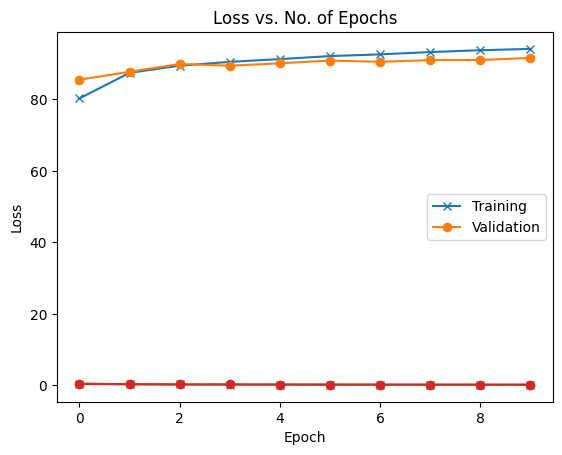

In [47]:
plot_accuracy(train_accuracies, val_accuracies)
plot_losses(train_losses, val_losses)

### Train a model on the entire dataset

In [48]:
indices, _ = split_indices(len(dataset), 0, rand_seed)

sampler = SubsetRandomSampler(indices)
dl = DataLoader(dataset, batch_size, sampler=sampler)

In [49]:
def train_model(num_epochs, model, dataloader, val_dataloader, loss_fn, optimizer, learning_rate):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode

        # Training phase
        running_loss = 0.0
        for batch_idx, (data, target) in enumerate(dataloader):
            # Forward pass
            output = model(data)

            # Compute the loss
            loss = loss_fn(output, target)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * data.size(0)

        # Compute average training loss for the epoch
        train_loss = running_loss / len(dataloader.dataset)
        train_losses.append(train_loss)

        # Print progress
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}")

    return model, train_losses, [], [], []
num_epochs = 10
lr = 0.001

In [52]:
model, _, _, _, _ = train_model(num_epochs, model, dl, [], loss_fn, opt_fn, lr)

Epoch 1/10, Train Loss: 0.1506, Train Accuracy: 94.38%
Epoch 2/10, Train Loss: 0.1367, Train Accuracy: 94.86%
Epoch 3/10, Train Loss: 0.1258, Train Accuracy: 95.22%
Epoch 4/10, Train Loss: 0.1130, Train Accuracy: 95.65%
Epoch 5/10, Train Loss: 0.1057, Train Accuracy: 95.98%
Epoch 6/10, Train Loss: 0.0965, Train Accuracy: 96.33%
Epoch 7/10, Train Loss: 0.0851, Train Accuracy: 96.67%
Epoch 8/10, Train Loss: 0.0801, Train Accuracy: 96.86%
Epoch 9/10, Train Loss: 0.0713, Train Accuracy: 97.32%
Epoch 10/10, Train Loss: 0.0670, Train Accuracy: 97.48%


### Check Predictions
Now, you should evaluate your model on dataset. Specifically, you should calculate the class probabilities for each image, and then visualize these probabilities along with the image itself. Please include a function `view_prediction` in your code that takes an image, its label, the calculated probabilities, and the list of class names as input, and plots the image along with the probabilities.

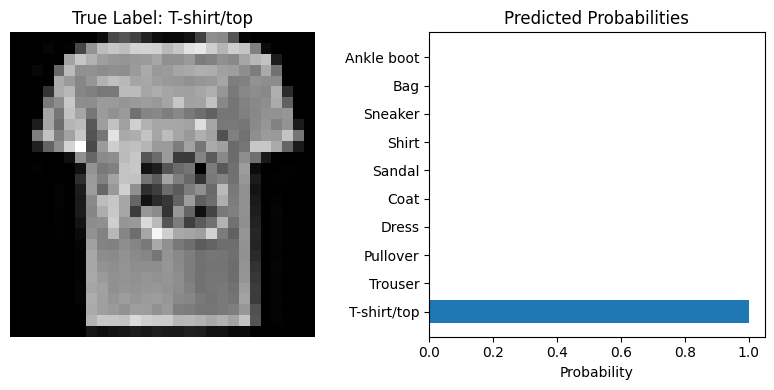

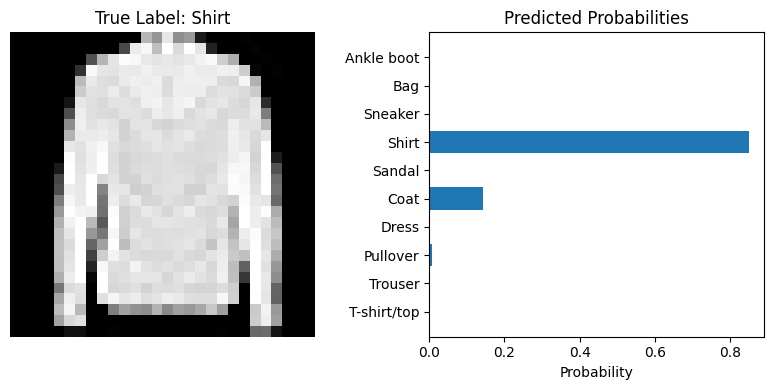

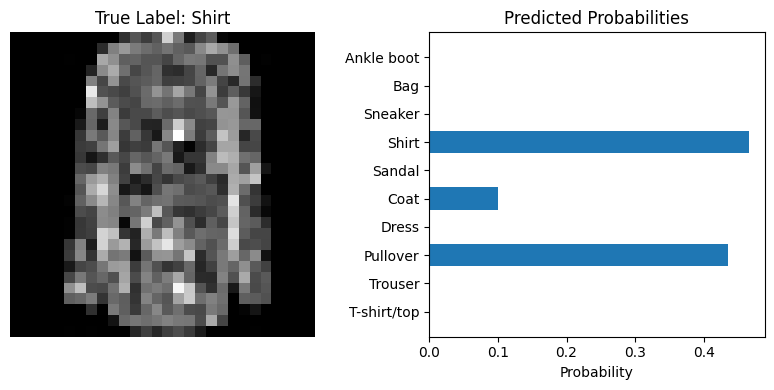

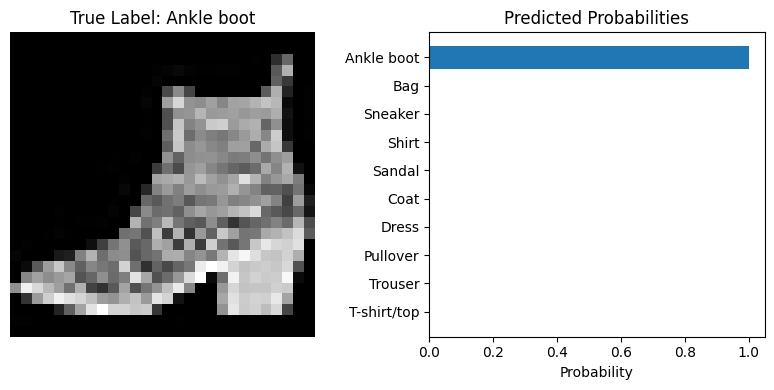

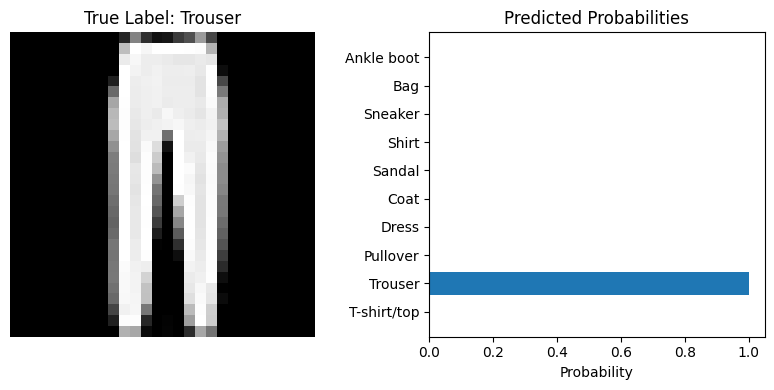

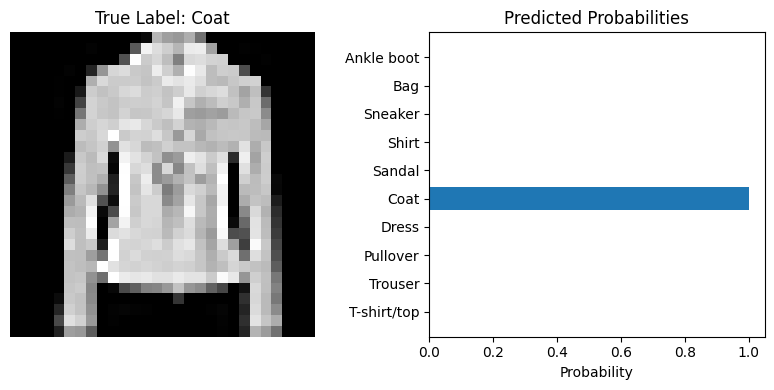

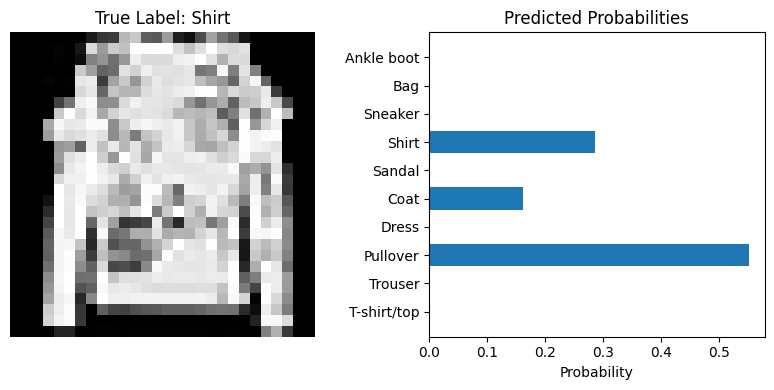

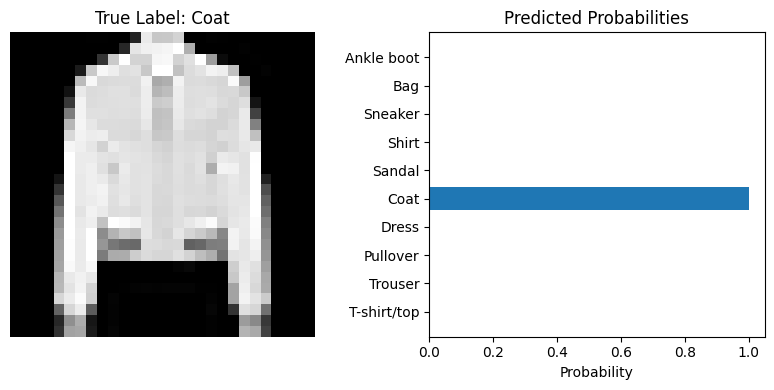

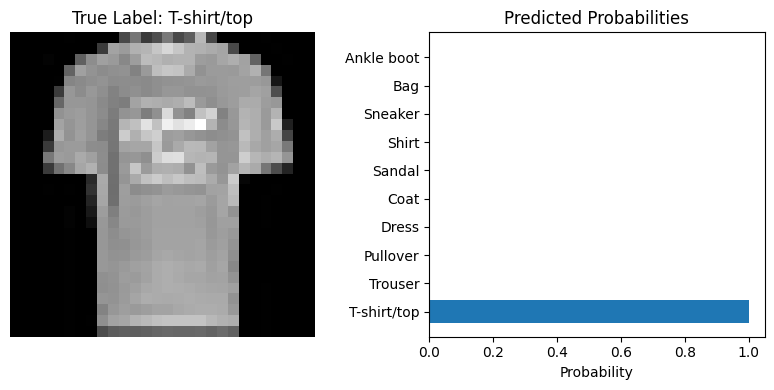

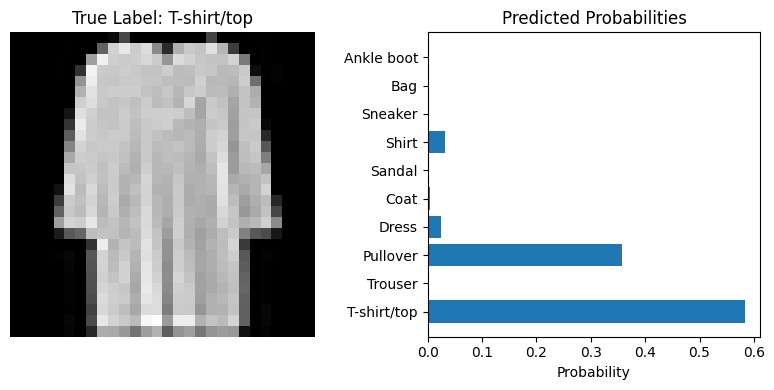

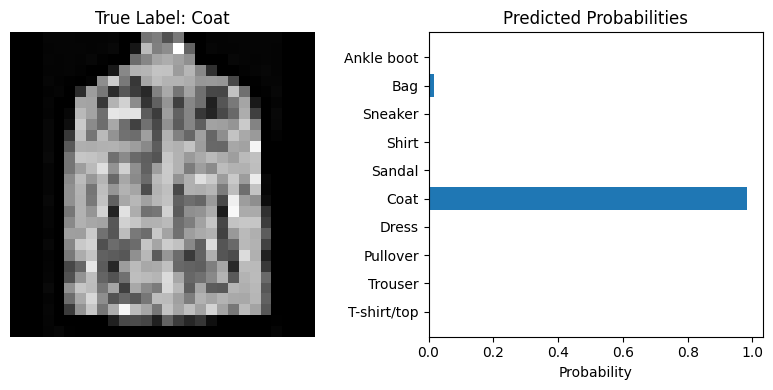

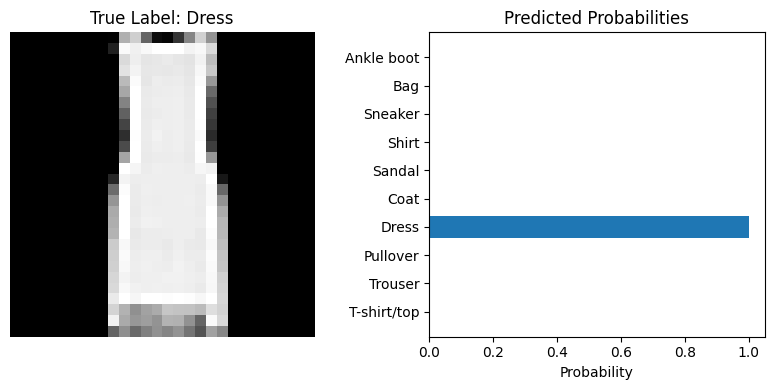

In [56]:
import matplotlib.pyplot as plt
import numpy as np

def view_prediction(img, label, probs, class_names):
    """
    Visualizes the image along with its predicted probabilities.
    
    Args:
        img: The image numpy array
        label: The true label
        probs: The predicted probabilities
        class_names: List of class names
    """
    plt.figure(figsize=(8, 4))  # Larger figure size
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'True Label: {class_names[label]}')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    y_pos = np.arange(len(class_names))
    plt.barh(y_pos, probs)
    plt.yticks(y_pos, class_names)
    plt.xlabel('Probability')
    plt.title('Predicted Probabilities')
    
    plt.tight_layout()
    plt.show()

# Class labels for FashionMNIST
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

def evaluate_model(model, dataloader, class_names, num_images=12):
    """
    Evaluates the model on the dataset and visualizes predictions.
    
    Args:
        model: The trained model
        dataloader: The data loader
        class_names: List of class names
        num_images: Number of images to display
    """
    images, labels = next(iter(dataloader))
    
    # Perform inference
    outputs = model(images)
    probabilities = np.exp(outputs) / np.exp(outputs).sum(axis=1, keepdims=True)
    
    # Visualize predictions for a few sample images
    for i in range(num_images):  # Display more images
        img = images[i].squeeze().numpy()
        label = labels[i].item()
        probs = probabilities[i]
        view_prediction(img, label, probs, class_names)

# Example usage
evaluate_model(model, val_dl, list(class_labels.values()), num_images=12)


### Save the model

In [57]:
torch.save(model, 'model')

### Calculate accuracy on the test set

In [58]:
test_dataset = FashionMNIST('MNIST_data/', download = True, train = False, transform = transform)
test_dl = DataLoader(test_dataset, batch_size)

In [61]:
def evaluate(model, test_dl):
    """
    Evaluates your model on the test data.
    
    Args:
        model: ImageClassifierNet object
        test_dl: test dataloader
    
    Returns: 
        Test accuracy.
    """

    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    
    for data in test_dl:
        images, labels = data
        
        # Forward pass (replace with your own model)
        outputs = model(images)
        
        # Get predictions
        _, predicted = torch.max(outputs, 1)
        
        # Update counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    return accuracy



In [62]:
print("Test Accuracy = {:.4f}".format(evaluate(model, test_dl)))

Test Accuracy = 90.2400
